In [2]:
#this script plots temperature data

#note the example data may be formatted differently from the actual data and might not work 
#unless data of the correct format is used.
#ExampleDataA can be found at
#www.renewables.ninja and Gelaro et al. (2017), doi: 10.1175/JCLI-D-16-0758.1 - Oxford Air Temperature



import os
import xlrd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import datetime
import seaborn as sns

In [3]:
#import the RadCam Lower Reading Room 5 minute temp and humidity data

df = pd.read_csv("C:\\Users\\Michael\\OneDrive - Nexus365\\LEO\\3YP Coding\\TemperaturePlotting\\ExampleDataA.csv",)
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d/%m/%Y %H:%M')
del df['Humidity']

df = df.sort_values(by="DateTime")
df.set_index('DateTime')



#http://blog.josephmisiti.com/group-by-datetimes-in-pandas
#df['Date'] = df["DateTime"].apply( lambda df : 
#datetime.datetime(year=df.year, month=df.month, day=df.day))	
#df.set_index(df["Date"],inplace=True)

#df = df.resample('d').mean()


,Temperature
DateTime,
2019-11-01 00:02:00,18.5
2019-11-01 00:07:00,18.5
2019-11-01 00:12:00,18.5
2019-11-01 00:17:00,18.4
2019-11-01 00:22:00,18.4
...,...
2020-11-13 14:21:00,21.1
2020-11-13 14:27:00,21.0
2020-11-13 14:31:00,21.0


In [4]:
df['Month'] = df['DateTime'].dt.month_name()
df['Day'] = df['DateTime'].dt.day_name()
df['Date']=df['DateTime'].dt.date
df['Hour']=df['DateTime'].dt.hour
df.head()

,DateTime,Temperature,Month,Day,Date,Hour
0,2019-11-01 00:02:00,18.5,November,Friday,2019-11-01,0
1,2019-11-01 00:07:00,18.5,November,Friday,2019-11-01,0
2,2019-11-01 00:12:00,18.5,November,Friday,2019-11-01,0
3,2019-11-01 00:17:00,18.4,November,Friday,2019-11-01,0
4,2019-11-01 00:22:00,18.4,November,Friday,2019-11-01,0


In [12]:
df1 = df.groupby(['Hour', 'Day'],sort=False).agg(['mean'])
df1.columns=df1.columns.droplevel(0)
df1.reset_index(inplace=True)
heatmap_data = pd.pivot_table(df1, values='mean', index=['Day'], columns='Hour')
heatmap_data.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day,,,,,,,,,,,,,,,,,,,,,
Friday,20.037462,19.849160,19.714307,19.541104,19.417337,19.272588,19.238931,19.813426,20.339542,20.730898,...,21.233181,21.303533,21.402118,21.357143,21.321846,21.228988,21.065485,20.838863,20.503049,20.215701
Monday,19.048270,18.897634,18.788179,18.663679,18.547574,18.457277,18.568297,19.233856,19.872500,20.276516,...,20.908087,21.022763,21.158842,21.159438,21.119340,21.026457,20.845541,20.601433,20.249844,19.975196
Saturday,20.020802,19.851868,19.679525,19.528356,19.338872,19.196000,19.114688,19.080357,19.350441,19.975672,...,20.592733,20.730236,20.577712,20.321145,20.127959,19.947470,19.739265,19.574332,19.444078,19.294239
Sunday,19.318997,19.195188,19.106288,18.958779,18.887692,18.778694,18.664407,18.650155,18.753953,19.232407,...,20.594907,20.709245,20.667442,20.530889,20.251534,19.994343,19.765023,19.539939,19.413456,19.228899
Thursday,20.023538,19.824357,19.670410,19.547041,19.373596,19.270197,19.230183,19.759484,20.352519,20.717523,...,21.210503,21.339704,21.398813,21.398214,21.370194,21.235768,21.098346,20.866263,20.553474,20.265373


In [6]:
cols = list(heatmap_data)
#cols.insert(0, cols.pop(cols.index('Monday')))
#cols.insert(1, cols.pop(cols.index('Tuesday')))
#cols.insert(2, cols.pop(cols.index('Wednesday')))
#cols.insert(3, cols.pop(cols.index('Thursday')))
#cols.insert(4, cols.pop(cols.index('Friday')))
#cols.insert(5, cols.pop(cols.index('Saturday')))
#heatmap_data = heatmap_data.loc[:, cols]

#months for heatmap
#Months=df1.Month.unique().tolist()
#heatmap_data=heatmap_data.loc[Months]

Text(0.5, 1.0, 'RadCam LRR Temperature (°C)')

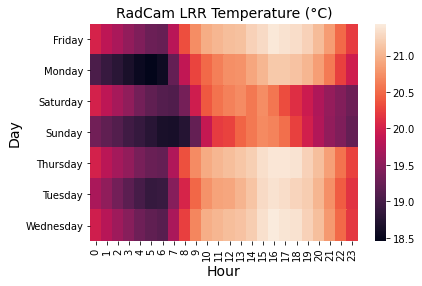

In [7]:
#plot the heatmap
sns.heatmap(heatmap_data)
plt.xlabel("Hour", size=14)
plt.ylabel("Day", size=14)
plt.title("RadCam LRR Temperature (°C)", size=14)